In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
# Загружаем датасет
df = pd.read_csv('insurance.csv')

print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nСтатистика:")
print(df.describe())


Размер датасета: 1338 строк, 7 столбцов

Первые 5 строк:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Статисти

In [10]:
# Задание 1. Подготовка данных.

In [6]:
print("1. ПОДГОТОВКА ДАННЫХ")
print("="*50)

# 1.1 Проверка пропусков
print("\n1.1 Проверка пропусков:")
missing = df.isnull().sum()
print(missing)
print(f"\nВсего пропусков: {missing.sum()}")

if missing.sum() > 0:
    print("Обнаружены пропуски. Удаляем строки с пропусками.")
    df = df.dropna()
    print(f"Размер после удаления: {df.shape[0]} строк")

1. ПОДГОТОВКА ДАННЫХ

1.1 Проверка пропусков:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Всего пропусков: 0



1.2 Проверка выбросов (метод IQR):
  age: 0 выбросов (0.00%)
  bmi: 9 выбросов (0.67%)
  children: 0 выбросов (0.00%)
  charges: 139 выбросов (10.39%)


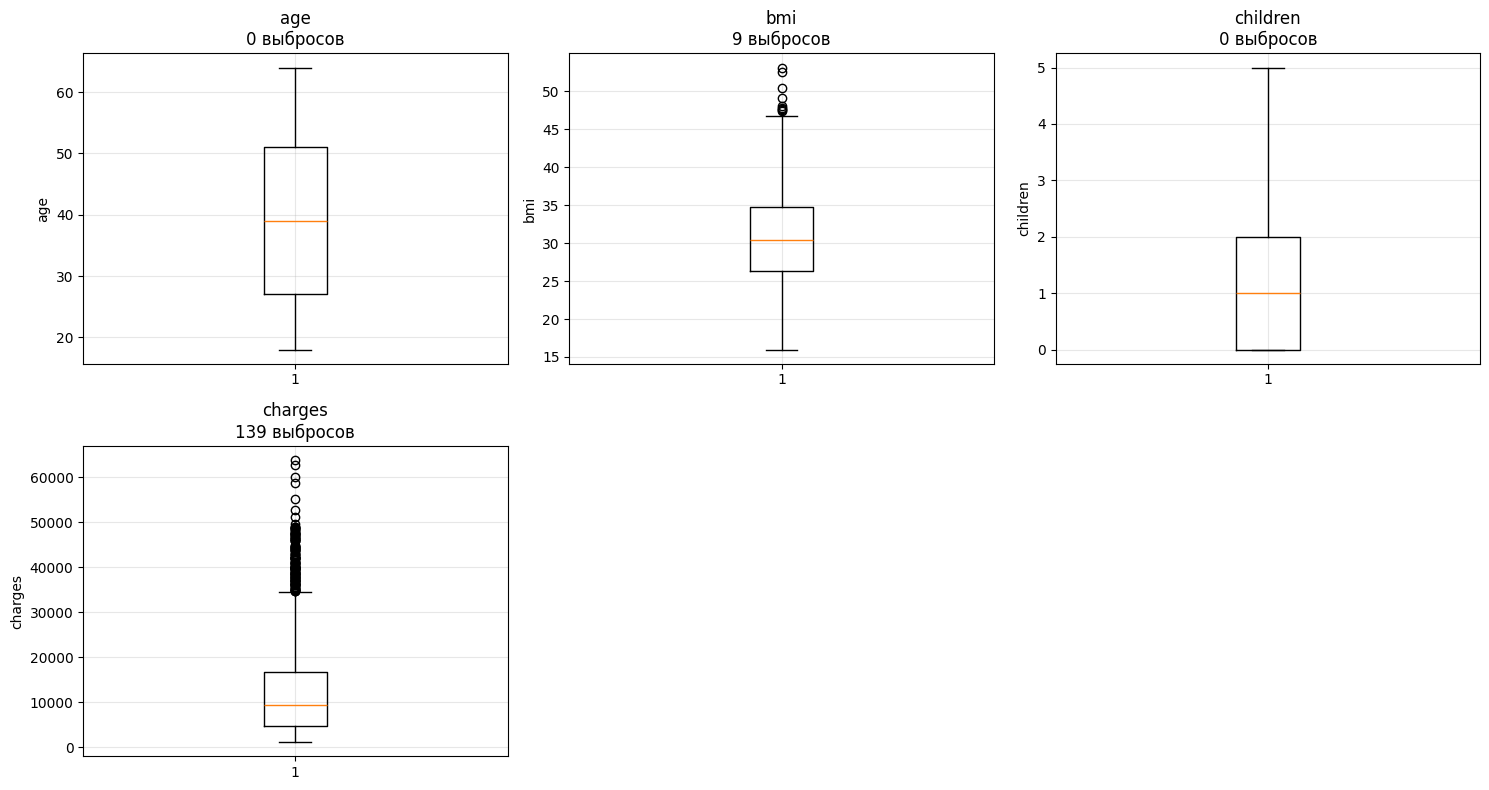


Выбросы обнаружены, но оставляем их (могут быть валидными значениями)


In [7]:
# 1.2 Проверка выбросов (для числовых признаков)
print("\n1.2 Проверка выбросов (метод IQR):")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

outliers_info = {}

for i, col in enumerate(numeric_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_info[col] = len(outliers)
    
    print(f"  {col}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")
    
    if i < len(axes):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'{col}\n{len(outliers)} выбросов')
        axes[i].set_ylabel(col)
        axes[i].grid(alpha=0.3)

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('lab3_outliers.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nВыбросы обнаружены, но оставляем их (могут быть валидными значениями)")

In [8]:
# 1.3 Кодирование категориальных признаков
print("\n1.3 Приведение категориальных признаков к числовым:")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

df_encoded = df.copy()

for col in categorical_cols:
    print(f"\n  {col}:")
    print(f"    Уникальные значения: {df[col].unique()}")
    
    if df[col].nunique() == 2:
        # Бинарный признак - используем 0/1
        print(f"    Тип: бинарный")
        unique_vals = df[col].unique()
        mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
        df_encoded[col] = df[col].map(mapping)
        print(f"    Кодирование: {mapping}")
    else:
        # Категориальный признак - используем One-Hot Encoding
        print(f"    Тип: категориальный (One-Hot Encoding)")
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded = df_encoded.drop(col, axis=1)
        print(f"    Создано столбцов: {len(dummies.columns)}")

print(f"\nРазмер после кодирования: {df_encoded.shape[0]} строк, {df_encoded.shape[1]} столбцов")
print("\nПервые строки закодированного датасета:")
print(df_encoded.head())


1.3 Приведение категориальных признаков к числовым:
Категориальные признаки: ['sex', 'smoker', 'region']

  sex:
    Уникальные значения: ['female' 'male']
    Тип: бинарный
    Кодирование: {'female': 0, 'male': 1}

  smoker:
    Уникальные значения: ['yes' 'no']
    Тип: бинарный
    Кодирование: {'yes': 0, 'no': 1}

  region:
    Уникальные значения: ['southwest' 'southeast' 'northwest' 'northeast']
    Тип: категориальный (One-Hot Encoding)
    Создано столбцов: 3

Размер после кодирования: 1338 строк, 9 столбцов

Первые строки закодированного датасета:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       0  16884.92400             False   
1   18    1  33.770         1       1   1725.55230             False   
2   28    1  33.000         3       1   4449.46200             False   
3   33    1  22.705         0       1  21984.47061              True   
4   32    1  28.880         0       1   3866.85520              True   

  


1.4 Парные корреляции признаков:
                       age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020856  0.109272  0.042469  0.025019  0.299008   
sex              -0.020856  1.000000  0.046371  0.017163 -0.076185  0.057292   
bmi               0.109272  0.046371  1.000000  0.012759 -0.003750  0.198341   
children          0.042469  0.017163  0.012759  1.000000 -0.007673  0.067998   
smoker            0.025019 -0.076185 -0.003750 -0.007673  1.000000 -0.787251   
charges           0.299008  0.057292  0.198341  0.067998 -0.787251  1.000000   
region_northwest -0.000407 -0.011156 -0.135996  0.024806  0.036945 -0.039905   
region_southeast -0.011642  0.017117  0.270025 -0.023066 -0.068498  0.073982   
region_southwest  0.010016 -0.004184 -0.006205  0.021914  0.036945 -0.043210   

                  region_northwest  region_southeast  region_southwest  
age                      -0.000407         -0.011642          0.010016  
sex                

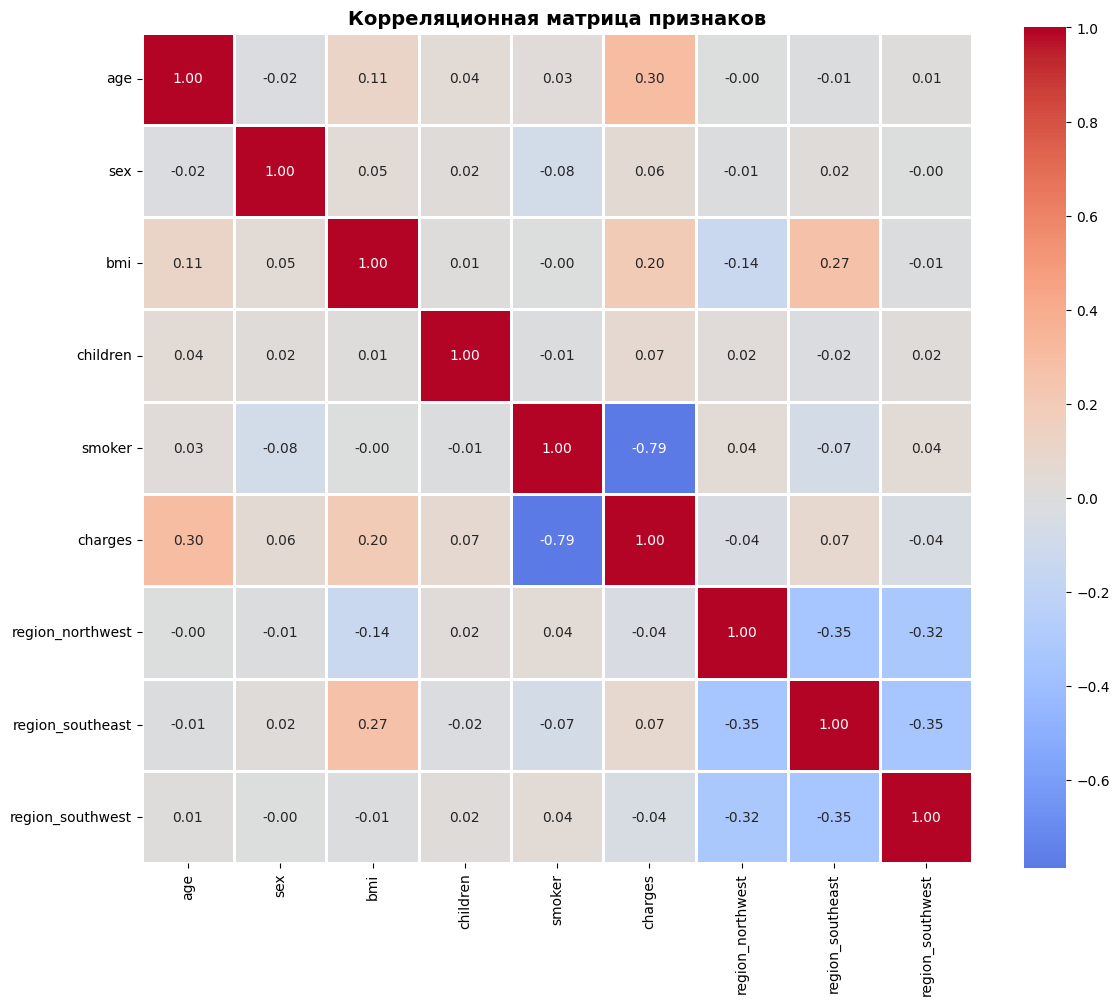


Сильно коррелированные пары (|r| > 0.7):
  smoker - charges: -0.787


In [9]:
# 1.4 Вычисление парных корреляций
print("\n1.4 Парные корреляции признаков:")

correlation_matrix = df_encoded.corr()
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Корреляционная матрица признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('lab3_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# Находим сильно коррелированные признаки
print("\nСильно коррелированные пары (|r| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))
            print(f"  {correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

if not high_corr:
    print("  Не обнаружено")

In [11]:
# Задание 2. Многомерная линейная регрессия.

In [ ]:
'''
Многомерная линейная регрессия моделирует зависимость целевой переменной y (здесь charges) от нескольких признаков 𝑥1, 𝑥2, ... , 𝑥𝑘.

Формула:
𝑦 = 𝑤0 + 𝑤1𝑥1 + 𝑤2𝑥2 + ⋯ + 𝑤𝑘𝑥𝑘 + 𝜖
'''

In [13]:
print("2. МНОГОМЕРНАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ")
print("="*50)

target_col = 'charges' 

X = df_encoded.drop(target_col, axis=1).astype(float).values
y = df_encoded[target_col].astype(float).values
X_with_intercept = np.column_stack([np.ones(len(X)), X])


print(f"\nРазмер матрицы признаков: {X_with_intercept.shape}")
print(f"Размер вектора целевой переменной: {y.shape}")

# 2.1 Аналитическое решение
print("\n2.1 Аналитическое решение:")
print("    Формула: w* = (X^T X)^(-1) X^T y")

try:
    # w = (X^T X)^(-1) X^T y
    XTX = X_with_intercept.T @ X_with_intercept
    XTy = X_with_intercept.T @ y
    w_analytical = np.linalg.solve(XTX, XTy)
    
    print("    Решение найдено!")
    print(f"\n    Параметры модели:")
    print(f"    w0 (intercept) = {w_analytical[0]:.4f}")
    for i in range(1, len(w_analytical)):
        if i-1 < len(df_encoded.drop(target_col, axis=1).columns):
            col_name = df_encoded.drop(target_col, axis=1).columns[i-1]
            print(f"    w{i} ({col_name}) = {w_analytical[i]:.4f}")
    
    # Предсказания
    y_pred_analytical = X_with_intercept @ w_analytical
    
    # Метрики
    mse_analytical = np.mean((y - y_pred_analytical)**2)
    rmse_analytical = np.sqrt(mse_analytical)
    mae_analytical = np.mean(np.abs(y - y_pred_analytical))
    r2_analytical = 1 - np.sum((y - y_pred_analytical)**2) / np.sum((y - np.mean(y))**2)
    
    print(f"\n    Метрики на обучающей выборке:")
    print(f"    MSE  = {mse_analytical:.2f}")
    print(f"    RMSE = {rmse_analytical:.2f}")
    print(f"    MAE  = {mae_analytical:.2f}")
    print(f"    R²   = {r2_analytical:.4f}")
    
except np.linalg.LinAlgError:
    print("    ОШИБКА: Матрица X^T X вырождена!")
    w_analytical = None

2. МНОГОМЕРНАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ

Размер матрицы признаков: (1338, 9)
Размер вектора целевой переменной: (1338,)

2.1 Аналитическое решение:
    Формула: w* = (X^T X)^(-1) X^T y
    Решение найдено!

    Параметры модели:
    w0 (intercept) = 11909.9960
    w1 (age) = 256.8564
    w2 (sex) = -131.3144
    w3 (bmi) = 339.1935
    w4 (children) = 475.5005
    w5 (smoker) = -23848.5345
    w6 (region_northwest) = -352.9639
    w7 (region_southeast) = -1035.0220
    w8 (region_southwest) = -960.0510

    Метрики на обучающей выборке:
    MSE  = 36501893.01
    RMSE = 6041.68
    MAE  = 4170.89
    R²   = 0.7509


In [ ]:
# Градиентный спуск — итерационный метод поиска оптимальных весов.


2.2 Численное решение (градиентный спуск):
    Итерация 100/1000, Loss = 0.970310
    Итерация 200/1000, Loss = 0.941545
    Итерация 300/1000, Loss = 0.913959
    Итерация 400/1000, Loss = 0.887501
    Итерация 500/1000, Loss = 0.862126
    Итерация 600/1000, Loss = 0.837785
    Итерация 700/1000, Loss = 0.814437
    Итерация 800/1000, Loss = 0.792039
    Итерация 900/1000, Loss = 0.770551
    Итерация 1000/1000, Loss = 0.749935

    Параметры модели:
    w0 (intercept) = 12482.1504
    w1 (age) = 46.6895
    w2 (sex) = 223.6798
    w3 (bmi) = 69.2577
    w4 (children) = 120.5221
    w5 (smoker) = -4278.5497
    w6 (region_northwest) = -172.5000
    w7 (region_southeast) = 303.5318
    w8 (region_southwest) = -202.6974

    Метрики на обучающей выборке:
    MSE  = 109868016.67
    RMSE = 10481.79
    MAE  = 7786.69
    R²   = 0.2503


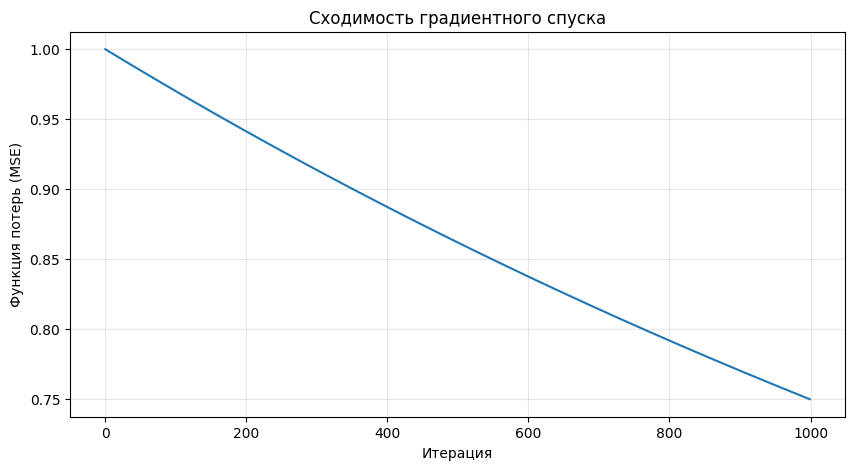

In [16]:
# 2.2 Численное решение (градиентный спуск)
print("\n2.2 Численное решение (градиентный спуск):")

def gradient_descent(X, y, learning_rate=0.0001, n_iterations=1000, tolerance=1e-6):
    """
    Градиентный спуск для линейной регрессии
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    
    # Нормализация данных для стабильности
    X_mean = np.mean(X[:, 1:], axis=0)
    X_std = np.std(X[:, 1:], axis=0) + 1e-8
    X_normalized = X.copy()
    X_normalized[:, 1:] = (X[:, 1:] - X_mean) / X_std
    
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_normalized = (y - y_mean) / y_std
    
    loss_history = []
    
    for iteration in range(n_iterations):
        # Предсказания
        y_pred = X_normalized @ w
        
        # Градиент: 2 * X^T * (Xw - y) / n
        gradient = (2 / n_samples) * X_normalized.T @ (y_pred - y_normalized)
        
        # Обновление весов
        w_new = w - learning_rate * gradient
        
        # Вычисление функции потерь
        loss = np.mean((y_pred - y_normalized)**2)
        loss_history.append(loss)
        
        # Критерий остановки
        if np.linalg.norm(w_new - w) < tolerance:
            print(f"    Сходимость достигнута на итерации {iteration}")
            break
        
        w = w_new
        
        if (iteration + 1) % 100 == 0:
            print(f"    Итерация {iteration+1}/{n_iterations}, Loss = {loss:.6f}")
    
    # Денормализация весов
    w_denorm = w.copy()
    w_denorm[1:] = w[1:] * y_std / X_std
    w_denorm[0] = w[0] * y_std + y_mean - np.sum(w_denorm[1:] * X_mean)
    
    return w_denorm, loss_history

w_gradient, loss_history = gradient_descent(X_with_intercept, y, 
                                           learning_rate=0.0001, 
                                           n_iterations=1000)

print(f"\n    Параметры модели:")
print(f"    w0 (intercept) = {w_gradient[0]:.4f}")
for i in range(1, len(w_gradient)):
    if i-1 < len(df_encoded.drop(target_col, axis=1).columns):
        col_name = df_encoded.drop(target_col, axis=1).columns[i-1]
        print(f"    w{i} ({col_name}) = {w_gradient[i]:.4f}")

# Предсказания
y_pred_gradient = X_with_intercept @ w_gradient

# Метрики
mse_gradient = np.mean((y - y_pred_gradient)**2)
rmse_gradient = np.sqrt(mse_gradient)
mae_gradient = np.mean(np.abs(y - y_pred_gradient))
r2_gradient = 1 - np.sum((y - y_pred_gradient)**2) / np.sum((y - np.mean(y))**2)

print(f"\n    Метрики на обучающей выборке:")
print(f"    MSE  = {mse_gradient:.2f}")
print(f"    RMSE = {rmse_gradient:.2f}")
print(f"    MAE  = {mae_gradient:.2f}")
print(f"    R²   = {r2_gradient:.4f}")

# График сходимости
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.xlabel('Итерация')
plt.ylabel('Функция потерь (MSE)')
plt.title('Сходимость градиентного спуска')
plt.grid(alpha=0.3)
plt.show()

In [17]:
# Сравнение методов
if w_analytical is not None:
    print("\n    Сравнение параметров:")
    print(f"    {'Признак':<20} {'Аналитика':<15} {'Градиент':<15} {'Разница':<15}")
    print("    " + "-"*65)
    print(f"    {'intercept':<20} {w_analytical[0]:>14.4f} {w_gradient[0]:>14.4f} {abs(w_analytical[0]-w_gradient[0]):>14.6f}")
    for i in range(1, len(w_gradient)):
        if i-1 < len(df_encoded.drop(target_col, axis=1).columns):
            col_name = df_encoded.drop(target_col, axis=1).columns[i-1]
            print(f"    {col_name:<20} {w_analytical[i]:>14.4f} {w_gradient[i]:>14.4f} {abs(w_analytical[i]-w_gradient[i]):>14.6f}")



    Сравнение параметров:
    Признак              Аналитика       Градиент        Разница        
    -----------------------------------------------------------------
    intercept                11909.9960     12482.1504     572.154456
    age                        256.8564        46.6895     210.166844
    sex                       -131.3144       223.6798     354.994130
    bmi                        339.1935        69.2577     269.935705
    children                   475.5005       120.5221     354.978460
    smoker                  -23848.5345     -4278.5497   19569.984805
    region_northwest          -352.9639      -172.5000     180.463920
    region_southeast         -1035.0220       303.5318    1338.553827
    region_southwest          -960.0510      -202.6974     757.353597


In [18]:
# Задание 3. Добавление регуляризации.

In [19]:
print("3. ДОБАВЛЕНИЕ РЕГУЛЯРИЗАЦИИ")
print("="*50)

# 3.1 Ridge регрессия (L2)
print("\n3.1 Ridge регрессия (L2-регуляризация):")
print("    Формула: w* = (X^T X + αI)^(-1) X^T y")

alpha = 1.0  # Параметр регуляризации
print(f"    Параметр регуляризации α = {alpha}")

# Аналитическое решение
XTX = X_with_intercept.T @ X_with_intercept
XTy = X_with_intercept.T @ y
I = np.eye(XTX.shape[0])
I[0, 0] = 0  # Не регуляризуем intercept

w_ridge_analytical = np.linalg.solve(XTX + alpha * I, XTy)

print(f"\n    Параметры модели (аналитическое решение):")
print(f"    w0 (intercept) = {w_ridge_analytical[0]:.4f}")
for i in range(1, len(w_ridge_analytical)):
    if i-1 < len(df_encoded.drop(target_col, axis=1).columns):
        col_name = df_encoded.drop(target_col, axis=1).columns[i-1]
        print(f"    w{i} ({col_name}) = {w_ridge_analytical[i]:.4f}")

y_pred_ridge_analytical = X_with_intercept @ w_ridge_analytical
mse_ridge_analytical = np.mean((y - y_pred_ridge_analytical)**2)
r2_ridge_analytical = 1 - np.sum((y - y_pred_ridge_analytical)**2) / np.sum((y - np.mean(y))**2)

print(f"\n    Метрики:")
print(f"    MSE  = {mse_ridge_analytical:.2f}")
print(f"    RMSE = {np.sqrt(mse_ridge_analytical):.2f}")
print(f"    R²   = {r2_ridge_analytical:.4f}")

# Численное решение Ridge
def ridge_gradient_descent(X, y, alpha=1.0, learning_rate=0.0001, n_iterations=1000, tolerance=1e-6):
    """
    Градиентный спуск для Ridge регрессии
    Градиент: 2 * X^T * (Xw - y) + 2 * α * w
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    
    # Нормализация
    X_mean = np.mean(X[:, 1:], axis=0)
    X_std = np.std(X[:, 1:], axis=0) + 1e-8
    X_normalized = X.copy()
    X_normalized[:, 1:] = (X[:, 1:] - X_mean) / X_std
    
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_normalized = (y - y_mean) / y_std
    
    loss_history = []
    
    for iteration in range(n_iterations):
        y_pred = X_normalized @ w
        
        # Градиент с L2-регуляризацией
        gradient = (2 / n_samples) * X_normalized.T @ (y_pred - y_normalized)
        gradient[1:] += (2 * alpha / n_samples) * w[1:]  # Не регуляризуем intercept
        
        w_new = w - learning_rate * gradient
        
        # Функция потерь с регуляризацией
        loss = np.mean((y_pred - y_normalized)**2) + alpha * np.sum(w[1:]**2) / n_samples
        loss_history.append(loss)
        
        if np.linalg.norm(w_new - w) < tolerance:
            print(f"    Сходимость достигнута на итерации {iteration}")
            break
        
        w = w_new
        
        if (iteration + 1) % 100 == 0:
            print(f"    Итерация {iteration+1}/{n_iterations}, Loss = {loss:.6f}")
    
    # Денормализация
    w_denorm = w.copy()
    w_denorm[1:] = w[1:] * y_std / X_std
    w_denorm[0] = w[0] * y_std + y_mean - np.sum(w_denorm[1:] * X_mean)
    
    return w_denorm, loss_history

print("\n    Численное решение (градиентный спуск):")
w_ridge_gradient, loss_ridge = ridge_gradient_descent(X_with_intercept, y, 
                                                       alpha=alpha,
                                                       learning_rate=0.0001, 
                                                       n_iterations=1000)

y_pred_ridge_gradient = X_with_intercept @ w_ridge_gradient
mse_ridge_gradient = np.mean((y - y_pred_ridge_gradient)**2)
r2_ridge_gradient = 1 - np.sum((y - y_pred_ridge_gradient)**2) / np.sum((y - np.mean(y))**2)

print(f"\n    Метрики:")
print(f"    MSE  = {mse_ridge_gradient:.2f}")
print(f"    RMSE = {np.sqrt(mse_ridge_gradient):.2f}")
print(f"    R²   = {r2_ridge_gradient:.4f}")

3. ДОБАВЛЕНИЕ РЕГУЛЯРИЗАЦИИ

3.1 Ridge регрессия (L2-регуляризация):
    Формула: w* = (X^T X + αI)^(-1) X^T y
    Параметр регуляризации α = 1.0

    Параметры модели (аналитическое решение):
    w0 (intercept) = 11821.2320
    w1 (age) = 256.7964
    w2 (sex) = -124.2183
    w3 (bmi) = 338.9464
    w4 (children) = 475.5648
    w5 (smoker) = -23738.1888
    w6 (region_northwest) = -347.8091
    w7 (region_southeast) = -1019.3946
    w8 (region_southwest) = -952.7176

    Метрики:
    MSE  = 36503869.89
    RMSE = 6041.84
    R²   = 0.7509

    Численное решение (градиентный спуск):
    Итерация 100/1000, Loss = 0.970310
    Итерация 200/1000, Loss = 0.941546
    Итерация 300/1000, Loss = 0.913962
    Итерация 400/1000, Loss = 0.887508
    Итерация 500/1000, Loss = 0.862135
    Итерация 600/1000, Loss = 0.837799
    Итерация 700/1000, Loss = 0.814455
    Итерация 800/1000, Loss = 0.792062
    Итерация 900/1000, Loss = 0.770580
    Итерация 1000/1000, Loss = 0.749970

    Метрики:
    M

In [20]:
# 3.2 LASSO регрессия (L1)
print("\n3.2 LASSO регрессия (L1-регуляризация):")
print("    Градиент: 2 * X^T * (Xw - y) + β * sign(w)")

beta = 1.0
print(f"    Параметр регуляризации β = {beta}")

def lasso_gradient_descent(X, y, beta=1.0, learning_rate=0.0001, n_iterations=1000, tolerance=1e-6):
    """
    Градиентный спуск для LASSO регрессии
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    
    # Нормализация
    X_mean = np.mean(X[:, 1:], axis=0)
    X_std = np.std(X[:, 1:], axis=0) + 1e-8
    X_normalized = X.copy()
    X_normalized[:, 1:] = (X[:, 1:] - X_mean) / X_std
    
    y_mean = np.mean(y)
    y_std = np.std(y)
    y_normalized = (y - y_mean) / y_std
    
    loss_history = []
    
    for iteration in range(n_iterations):
        y_pred = X_normalized @ w
        
        # Градиент с L1-регуляризацией
        gradient = (2 / n_samples) * X_normalized.T @ (y_pred - y_normalized)
        gradient[1:] += (beta / n_samples) * np.sign(w[1:])
        
        w_new = w - learning_rate * gradient
        
        # Функция потерь
        loss = np.mean((y_pred - y_normalized)**2) + beta * np.sum(np.abs(w[1:])) / n_samples
        loss_history.append(loss)
        
        if np.linalg.norm(w_new - w) < tolerance:
            print(f"    Сходимость достигнута на итерации {iteration}")
            break
        
        w = w_new
        
        if (iteration + 1) % 100 == 0:
            print(f"    Итерация {iteration+1}/{n_iterations}, Loss = {loss:.6f}")
    
    # Денормализация
    w_denorm = w.copy()
    w_denorm[1:] = w[1:] * y_std / X_std
    w_denorm[0] = w[0] * y_std + y_mean - np.sum(w_denorm[1:] * X_mean)
    
    return w_denorm, loss_history

w_lasso, loss_lasso = lasso_gradient_descent(X_with_intercept, y,
                                             beta=beta,
                                             learning_rate=0.0001,
                                             n_iterations=1000)

y_pred_lasso = X_with_intercept @ w_lasso
mse_lasso = np.mean((y - y_pred_lasso)**2)
r2_lasso = 1 - np.sum((y - y_pred_lasso)**2) / np.sum((y - np.mean(y))**2)

print(f"\n    Метрики:")
print(f"    MSE  = {mse_lasso:.2f}")
print(f"    RMSE = {np.sqrt(mse_lasso):.2f}")
print(f"    R²   = {r2_lasso:.4f}")


3.2 LASSO регрессия (L1-регуляризация):
    Градиент: 2 * X^T * (Xw - y) + β * sign(w)
    Параметр регуляризации β = 1.0
    Итерация 100/1000, Loss = 0.970355
    Итерация 200/1000, Loss = 0.941633
    Итерация 300/1000, Loss = 0.914088
    Итерация 400/1000, Loss = 0.887671
    Итерация 500/1000, Loss = 0.862332
    Итерация 600/1000, Loss = 0.838027
    Итерация 700/1000, Loss = 0.814713
    Итерация 800/1000, Loss = 0.792347
    Итерация 900/1000, Loss = 0.770890
    Итерация 1000/1000, Loss = 0.750304

    Метрики:
    MSE  = 109891703.87
    RMSE = 10482.92
    R²   = 0.2501


In [21]:
# Сравнение весов
print("\n    Сравнение величины весов:")
print(f"    {'Признак':<20} {'Обычная':<12} {'Ridge':<12} {'LASSO':<12}")
print("    " + "-"*56)
for i in range(len(w_gradient)):
    if i == 0:
        name = 'intercept'
    elif i-1 < len(df_encoded.drop(target_col, axis=1).columns):
        name = df_encoded.drop(target_col, axis=1).columns[i-1]
    else:
        name = f'w{i}'
    print(f"    {name:<20} {abs(w_gradient[i]):>11.4f} {abs(w_ridge_gradient[i]):>11.4f} {abs(w_lasso[i]):>11.4f}")



    Сравнение величины весов:
    Признак              Обычная      Ridge        LASSO       
    --------------------------------------------------------
    intercept             12482.1504  12482.2051  12487.8255
    age                      46.6895     46.6861     46.6316
    sex                     223.6798    223.6643    222.0643
    bmi                      69.2577     69.2528     69.1307
    children                120.5221    120.5135    119.8429
    smoker                 4278.5497   4278.2410   4276.5584
    region_northwest        172.5000    172.4883    170.6184
    region_southeast        303.5318    303.5114    301.8679
    region_southwest        202.6974    202.6832    200.7906


In [22]:
# Задание 4. Оценка обобщающей способности.

4. ОЦЕНКА ОБОБЩАЮЩЕЙ СПОСОБНОСТИ

Размер обучающей выборки: 1070
Размер тестовой выборки: 268

Обучение моделей на обучающей выборке...

СРАВНЕНИЕ МОДЕЛЕЙ

Модель                    MSE (train)     MSE (test)      RMSE (test)    
----------------------------------------------------------------------
1. Константная              144333621.93   155391443.68       12465.61
2. Линейная                  37277681.70    33596915.85        5796.28
3. Ridge (L2)                37280685.79    33645037.09        5800.43


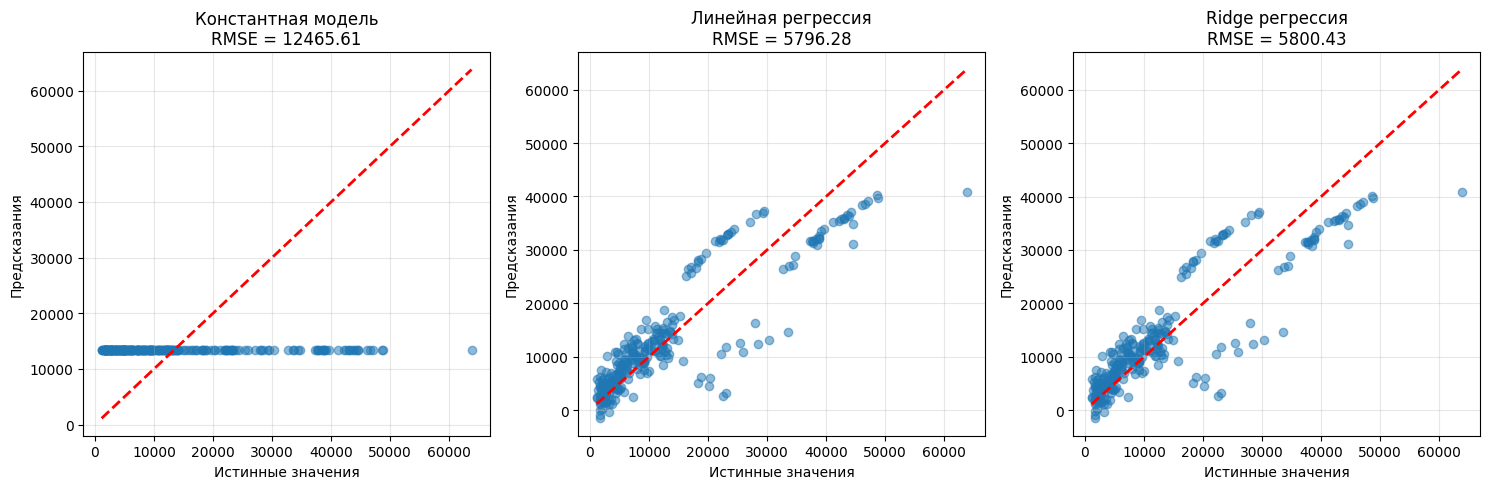

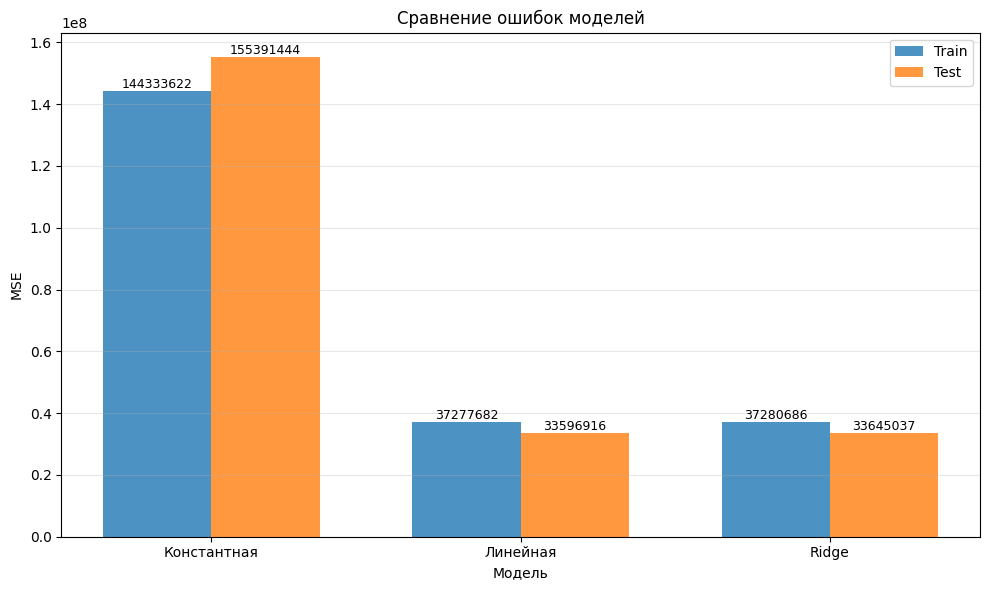

In [23]:
print("4. ОЦЕНКА ОБОБЩАЮЩЕЙ СПОСОБНОСТИ")
print("="*50)

# Разделение на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Добавляем intercept
X_train_int = np.column_stack([np.ones(len(X_train)), X_train])
X_test_int = np.column_stack([np.ones(len(X_test)), X_test])

print(f"\nРазмер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# Обучаем модели на train
print("\nОбучение моделей на обучающей выборке...")

# 1. Константная модель (среднее)
y_train_mean = np.mean(y_train)
y_pred_const_train = np.full_like(y_train, y_train_mean)
y_pred_const_test = np.full_like(y_test, y_train_mean)

mse_const_train = np.mean((y_train - y_pred_const_train)**2)
mse_const_test = np.mean((y_test - y_pred_const_test)**2)

# 2. Обычная регрессия
XTX = X_train_int.T @ X_train_int
XTy = X_train_int.T @ y_train
w_train = np.linalg.solve(XTX, XTy)

y_pred_linear_train = X_train_int @ w_train
y_pred_linear_test = X_test_int @ w_train

mse_linear_train = np.mean((y_train - y_pred_linear_train)**2)
mse_linear_test = np.mean((y_test - y_pred_linear_test)**2)

# 3. Ridge регрессия
I = np.eye(XTX.shape[0])
I[0, 0] = 0
w_ridge_train = np.linalg.solve(XTX + alpha * I, XTy)

y_pred_ridge_train = X_train_int @ w_ridge_train
y_pred_ridge_test = X_test_int @ w_ridge_train

mse_ridge_train = np.mean((y_train - y_pred_ridge_train)**2)
mse_ridge_test = np.mean((y_test - y_pred_ridge_test)**2)

# Результаты
print("\n" + "="*60)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)
print(f"\n{'Модель':<25} {'MSE (train)':<15} {'MSE (test)':<15} {'RMSE (test)':<15}")
print("-"*70)
print(f"{'1. Константная':<25} {mse_const_train:>14.2f} {mse_const_test:>14.2f} {np.sqrt(mse_const_test):>14.2f}")
print(f"{'2. Линейная':<25} {mse_linear_train:>14.2f} {mse_linear_test:>14.2f} {np.sqrt(mse_linear_test):>14.2f}")
print(f"{'3. Ridge (L2)':<25} {mse_ridge_train:>14.2f} {mse_ridge_test:>14.2f} {np.sqrt(mse_ridge_test):>14.2f}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# График 1: Константная модель
axes[0].scatter(y_test, y_pred_const_test, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Истинные значения')
axes[0].set_ylabel('Предсказания')
axes[0].set_title(f'Константная модель\nRMSE = {np.sqrt(mse_const_test):.2f}')
axes[0].grid(alpha=0.3)

# График 2: Линейная модель
axes[1].scatter(y_test, y_pred_linear_test, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Истинные значения')
axes[1].set_ylabel('Предсказания')
axes[1].set_title(f'Линейная регрессия\nRMSE = {np.sqrt(mse_linear_test):.2f}')
axes[1].grid(alpha=0.3)

# График 3: Ridge модель
axes[2].scatter(y_test, y_pred_ridge_test, alpha=0.5)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Истинные значения')
axes[2].set_ylabel('Предсказания')
axes[2].set_title(f'Ridge регрессия\nRMSE = {np.sqrt(mse_ridge_test):.2f}')
axes[2].grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Сравнение ошибок
models = ['Константная', 'Линейная', 'Ridge']
mse_train_vals = [mse_const_train, mse_linear_train, mse_ridge_train]
mse_test_vals = [mse_const_test, mse_linear_test, mse_ridge_test]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, mse_train_vals, width, label='Train', alpha=0.8)
bars2 = ax.bar(x + width/2, mse_test_vals, width, label='Test', alpha=0.8)

ax.set_xlabel('Модель')
ax.set_ylabel('MSE')
ax.set_title('Сравнение ошибок моделей')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()